# Анализ бизнес-показателей развлекательного приложения 

## Описание проекта

Компания выпустила на рынок развлекательное приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо выяснить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Описание данных.

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- evice — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

## Цель проекта
**Разобраться в причинах убытков и помочь компании выйти в прибыль**

## 1. Загрузка данных и подготовка к анализу 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
# выгрузим данные
try:
    visits, orders, costs = (
        pd.read_csv('...csv'),  # журнал сессий
        pd.read_csv('...csv'),  # покупки
        pd.read_csv('...csv'),  # траты на рекламу
    )
except:
    visits, orders, costs = (
        pd.read_csv('https://...csv'),  # журнал сессий
        pd.read_csv('https://...csv'),  # покупки
        pd.read_csv('https://...csv'),  # траты на рекламу        
    )     

In [3]:
# посмотрим на данные
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Выводы:


Пропусков данных нет. Нужно исправить написание наименований столбцов. Столбцы с датой и временем нужно привести к типу datetime.

Исправим наименования столбцов с помощью библиотеки skimpy

In [9]:
from skimpy import clean_columns

In [10]:
visits = clean_columns(visits, case='snake', replace=None, remove_accents=True)
orders = clean_columns(orders, case='snake', replace=None, remove_accents=True)
costs = clean_columns(costs, case='snake', replace=None, remove_accents=True)

In [11]:
 # проверим
visits.columns, orders.columns, costs.columns

(Index(['user_id', 'region', 'device', 'channel', 'session_start',
        'session_end'],
       dtype='object'),
 Index(['user_id', 'event_dt', 'revenue'], dtype='object'),
 Index(['dt', 'channel', 'costs'], dtype='object'))

In [12]:
# изменим тип данных о времени на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [13]:
# проверим
costs['dt'].dtype, visits['session_start'].dtype, visits['session_end'].dtype, orders['event_dt'].dtype

(dtype('O'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'))

Проверим данные на наличие дубликатов

In [14]:
# проверим на наличие явных дубликатов
visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum()

(0, 0, 0)

In [15]:
# проверим наличие неявных дубликатов
# учитывая небольшое количество уникальных наименований не будем приводить данные к нижнему регистру
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [16]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [17]:
sorted(visits['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

In [18]:
sorted(costs['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

### Выводы:

Выполнена загрузка, проверка и предобработка данных: исправлены наименования столбцов; изменен тип данных, отражающих дату и время, на datetime; проведена проверка на наличие дубликатов - явных и неявных дубликатов не обнаружено.

## 2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Получим функции из теории спринта.

**Функция для создания пользовательских профилей**

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


**Функция для расчёта удержания**

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта конверсии**

In [21]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчёта LTV и ROI**

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция для сглаживания фрейма**

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Функция для визуализации удержания**

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для визуализации конверсии**

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI**

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных

### 3.1. Профили пользователей. Минимальная и максимальная даты привлечения пользователей

In [27]:
# получаем профили пользователей
events = []
profiles = get_profiles(visits, orders, events, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt    month  payer  acquisition_cost  
0  2019-05-07  2019-05   True          1.088172  
1  2019-07-09  2019-07  False          1.107237  
2  2019-10-01  2019-10  False          0.000000  
3  2019-08-22  2019-08  False          0.988235  
4  2019-10-02  2019-10  False          0.230769

In [28]:
# минимальная дата привлечения
f"минимальная дата привлечения - {profiles['first_ts'].dt.date.min()}"

'минимальная дата привлечения - 2019-05-01'

In [29]:
# максимальная дата привлечения
f"максимальная дата привлечения - {profiles['first_ts'].dt.date.max()}"

'максимальная дата привлечения - 2019-10-27'

#### Выводы: ####
Профили пользователей сформированы.

Минимальная дата привлечения - 2019.05.01, Максимальная дата привлечения - 2019.10.27

### 3.2. Распределение пользователей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Для этого напишем функцию, которая будет рассчитывать распределение:
- всех пользователей, 
- платящих пользователей 
- и их доли по заданному параметру.

In [30]:
# функция для расчета распределений всех пользователей, платящих пользователей и их доли по заданному параметру
def user_distribution(parameter):
    users = profiles[parameter].value_counts().reset_index()    
    paying_users = profiles.query('payer == True')[parameter].value_counts().reset_index() 
    paying_users.columns = [parameter, 'count']
    user_distribution = users.merge(paying_users, on=parameter)
    user_distribution.columns = [parameter, 'users', 'paying_users']               
    user_distribution['%_paying'] = (user_distribution['paying_users'] * 100  / user_distribution['users']).round(2)
    return user_distribution

In [31]:
# количество пользователей, количество платящих пользователей и доля (процент) платящих из каждой страны
user_distribution('region')

region   users  paying_users  %_paying
0  United States  100002          6902      6.90
1             UK   17575           700      3.98
2         France   17450           663      3.80
3        Germany   14981           616      4.11

#### Выводы: ####
Пользователи приходят из United States, UK, France, Germany. Больше всего платящих пользователей в United States (почти в 10 раз боле, чем в каждой из других стран), там же и самая большая доля платящих пользователей. Создается впечатление, что почти все деньги (имеется ввиду прибыль) компания зарабатывает в США.

### 3.3. Распределение пользователей по устройствам
Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [32]:
# количество пользователей, количество платящих пользователей и доля (процент) платящих по устройствам
user_distribution('device')

device  users  paying_users  %_paying
0   iPhone  54479          3382      6.21
1  Android  35032          2050      5.85
2       PC  30455          1537      5.05
3      Mac  30042          1912      6.36

#### Выводы: ####
Пользователи используют iPhone, Android, PC и Mac. Более платящие пользователи предпочитают iPhone и Mac.

Рассчитаем доли каждого дивайса в каждой стране

In [33]:
# доля Mac от всех дивайсов (в процентах) по странам
profiles.query('device == "Mac"').groupby('region')['device'].count() /\
profiles.groupby('region')['device'].count() * 100

region
France           10.532951
Germany          10.573393
UK               10.116643
United States    24.841503
Name: device, dtype: float64

In [34]:
# доля iPhone от всех дивайсов (в процентах) по странам
profiles.query('device == "iPhone"').groupby('region')['device'].count() /\
profiles.groupby('region')['device'].count() * 100

region
France           19.598854
Germany          20.105467
UK               20.017070
United States    44.528109
Name: device, dtype: float64

In [35]:
# доля Android от всех дивайсов (в процентах) по странам
profiles.query('device == "Android"').groupby('region')['device'].count() /\
profiles.groupby('region')['device'].count() * 100

region
France           30.097421
Germany          29.637541
UK               29.251778
United States    20.198596
Name: device, dtype: float64

In [36]:
# доля PC от всех дивайсов (в процентах) по странам
profiles.query('device == "PC"').groupby('region')['device'].count() /\
profiles.groupby('region')['device'].count() * 100

region
France           39.770774
Germany          39.683599
UK               40.614509
United States    10.431791
Name: device, dtype: float64

В Америке доля пользователей, использующих продукты Apple, выше более чем в 2 раза, чем других странах, а доля РС в Америке в 4 раза меньше, чем в Европе.

### 3.4. Распределение пользователей по каналам
Определим рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [37]:
# количество пользователей и доля платящих по источникам привлечения с сортировкой по количеству пользователей
(
profiles.groupby('channel')   
    .agg({'user_id':'count', 'payer':'mean'})
    .sort_values(by='user_id', ascending=False) 
    .rename(columns={'user_id':'count_of_users', 'payer': '%_paying'})
    .style.format({'%_paying': "{:.2%}"})     
)

In [38]:
# количество пользователей и доля платящих по источникам привлечения с сортировкой по проценту платящих пользователей
(
profiles.groupby('channel')   
    .agg({'user_id':'count', 'payer':'mean'})
    .sort_values(by='payer', ascending=False) 
    .rename(columns={'user_id':'count_of_users', 'payer': '%_paying'})
    .style.format({'%_paying': "{:.2%}"})     
)

#### Выводы: ####
Больше всего платящих пользователей пришло из FaceBoom, TipTop и organic. Доля платящих пользателей наиболее высокая у FaceBoom, AdNonSense и lambdaMediaAds.

In [39]:
# количество пользователей, количество платящих пользователей, доля (процент) платящих по каналам, 
# доля (процент) привлеченных пользователей по каналам
user_distribution_channel = user_distribution('channel')
user_distribution_channel['%_of_users'] = round(user_distribution_channel['users'] /
user_distribution_channel['users'].sum()*100, 2)
user_distribution_channel

channel  users  paying_users  %_paying  %_of_users
0              organic  56439          1160      2.06       37.62
1             FaceBoom  29144          3557     12.20       19.43
2               TipTop  19561          1878      9.60       13.04
3   OppleCreativeMedia   8605           233      2.71        5.74
4              LeapBob   8553           262      3.06        5.70
5       WahooNetBanner   8553           453      5.30        5.70
6       RocketSuperAds   4448           352      7.91        2.97
7         MediaTornado   4364           156      3.57        2.91
8              YRabbit   4312           165      3.83        2.87
9           AdNonSense   3880           440     11.34        2.59
10      lambdaMediaAds   2149           225     10.47        1.43

Доля органики в привлечении всех пользователей составляет 37,62% от всех каналов - самая высокая. Но доля платящих клиентов от привлеченных - самя низкая 2,06%.

## 4. Маркетинг

Расчитаем общую сумму расходов на маркетинг.
Выясним, как траты распределены по рекламным источникам.
Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [40]:
# общая сумма расходов на маркетинг
round(costs['costs'].sum(), 2)

105497.3

In [41]:
# распределение расходов на маркетинг по источникам в абсолютном и долевом выражении
t = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
t['%'] = ((t['costs'] / costs['costs'].sum()) * 100).round(2)
t

costs      %
channel                            
TipTop              54751.30  51.90
FaceBoom            32445.60  30.75
WahooNetBanner       5151.00   4.88
AdNonSense           3911.25   3.71
OppleCreativeMedia   2151.25   2.04
RocketSuperAds       1833.00   1.74
LeapBob              1797.60   1.70
lambdaMediaAds       1557.60   1.48
MediaTornado          954.48   0.90
YRabbit               944.22   0.90

In [42]:
# для построения графиков динамики расходов на маркетинг во времении 
# создадим столбцы с номером месяца и номером недели
costs['month'] = pd.DatetimeIndex(costs['dt']).month
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week

In [43]:
# сгруппируем данные по месяцам
data = costs.groupby(['month', 'channel']).agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
data.head()

month channel    costs
0      9  TipTop  13232.5
1     10  TipTop  12250.0
2      8  TipTop  11202.0
3      7  TipTop   8410.2
4      6  TipTop   6675.6

In [44]:
import warnings
warnings.filterwarnings("ignore")

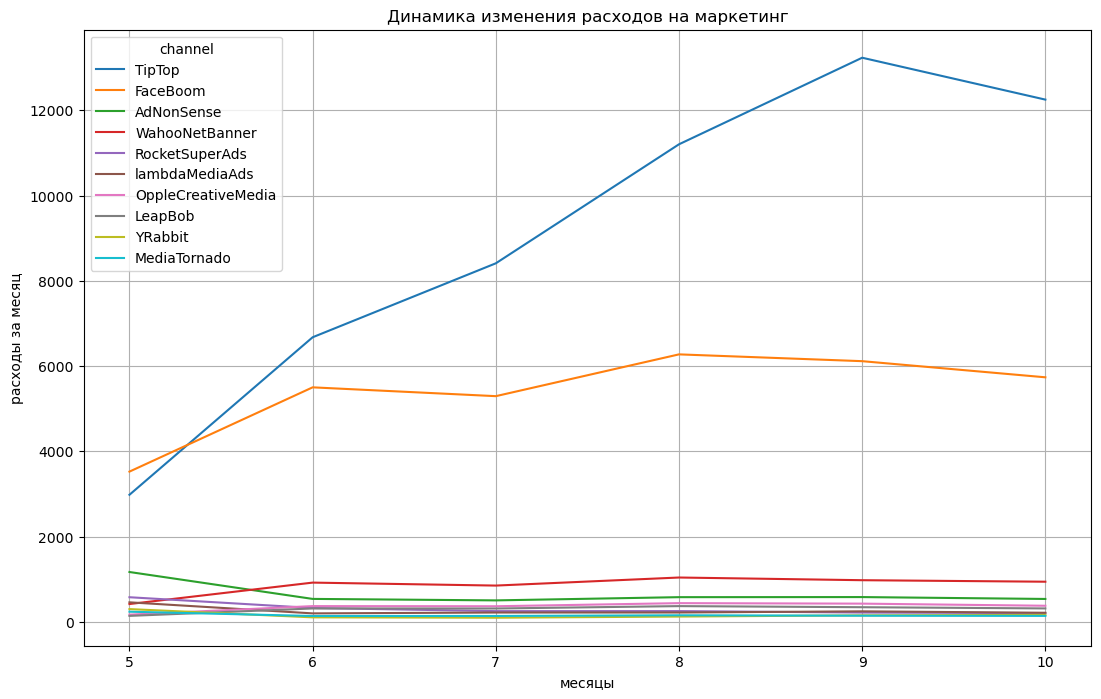

In [45]:
# визуализируем Динамику изменения расходов на маркетинг
fig, ax = plt.subplots(figsize=(13, 8))
sns.lineplot(x='month', y='costs', data=data, hue='channel')
ax.set(title = 'Динамика изменения расходов на маркетинг', xlabel = 'месяцы', ylabel = 'расходы за месяц')
plt.grid(True);

In [46]:
# сгруппируем данные по неделям
data = costs.groupby(['week', 'channel']).agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
data.head()

week channel   costs
0    39  TipTop  3979.5
1    40  TipTop  3703.0
2    43  TipTop  3265.5
3    38  TipTop  3241.0
4    41  TipTop  3097.5

In [47]:
data['week'] = data['week'].astype(int)

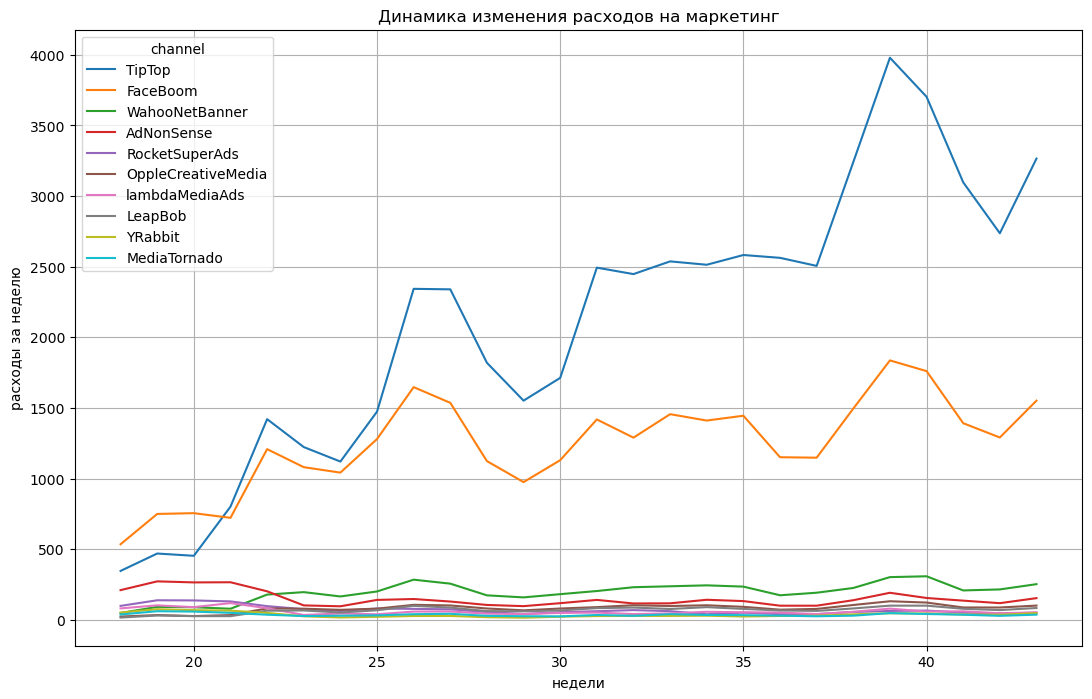

In [48]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.lineplot(x='week', y='costs', data=data, hue='channel')
ax.set(title = 'Динамика изменения расходов на маркетинг', xlabel = 'недели', ylabel = 'расходы за неделю')
plt.grid(True);

Исключаем органику

In [49]:
# расходы на привлечение одного пользователя (CAC) из каждого источника (costs_per_user)
# исключим органику из списка каналов
profiles_without_organic = profiles.query('channel != "organic"')
cac = (
    profiles_without_organic.groupby('channel')
    .agg({'user_id':'count', 'acquisition_cost':'sum'})
    .reset_index()
    .rename(columns={'user_id':'count_of_users'})
)
cac['costs_per_user'] = cac['acquisition_cost'] / cac['count_of_users']
cac.sort_values(by='acquisition_cost', ascending=False)

channel  count_of_users  acquisition_cost  costs_per_user
6              TipTop           19561          54751.30        2.799003
1            FaceBoom           29144          32445.60        1.113286
7      WahooNetBanner            8553           5151.00        0.602245
0          AdNonSense            3880           3911.25        1.008054
4  OppleCreativeMedia            8605           2151.25        0.250000
5      RocketSuperAds            4448           1833.00        0.412095
2             LeapBob            8553           1797.60        0.210172
9      lambdaMediaAds            2149           1557.60        0.724802
3        MediaTornado            4364            954.48        0.218717
8             YRabbit            4312            944.22        0.218975

In [50]:
cac['costs_per_user'].describe()

count    10.000000
mean      0.755735
std       0.791550
min       0.210172
25%       0.226731
50%       0.507170
75%       0.937241
max       2.799003
Name: costs_per_user, dtype: float64

### Выводы:
Общие расходы на маркетинг составляют 105497.3. Большая часть расходов идет на 2 канала: TipTop (52%) и FaceBoom (31%). Расходы на эти два канала со временем растут в несколько раз, в то время расходы на другие каналы практически не меняются. Средние расходы на привлечение одного пользователя (CAC) по источникам существенно отличаются, разброс составляет от 0.21 до аномальных значений 2.8.


## 5. Оценка окупаемости рекламы

In [51]:
# Установим момент и горизонт анализа данных. Считаем, что на календаре 1 ноября 2019 года, 
# и зададим 2-х недельный горизонт анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

считаем LTV и ROI без органики

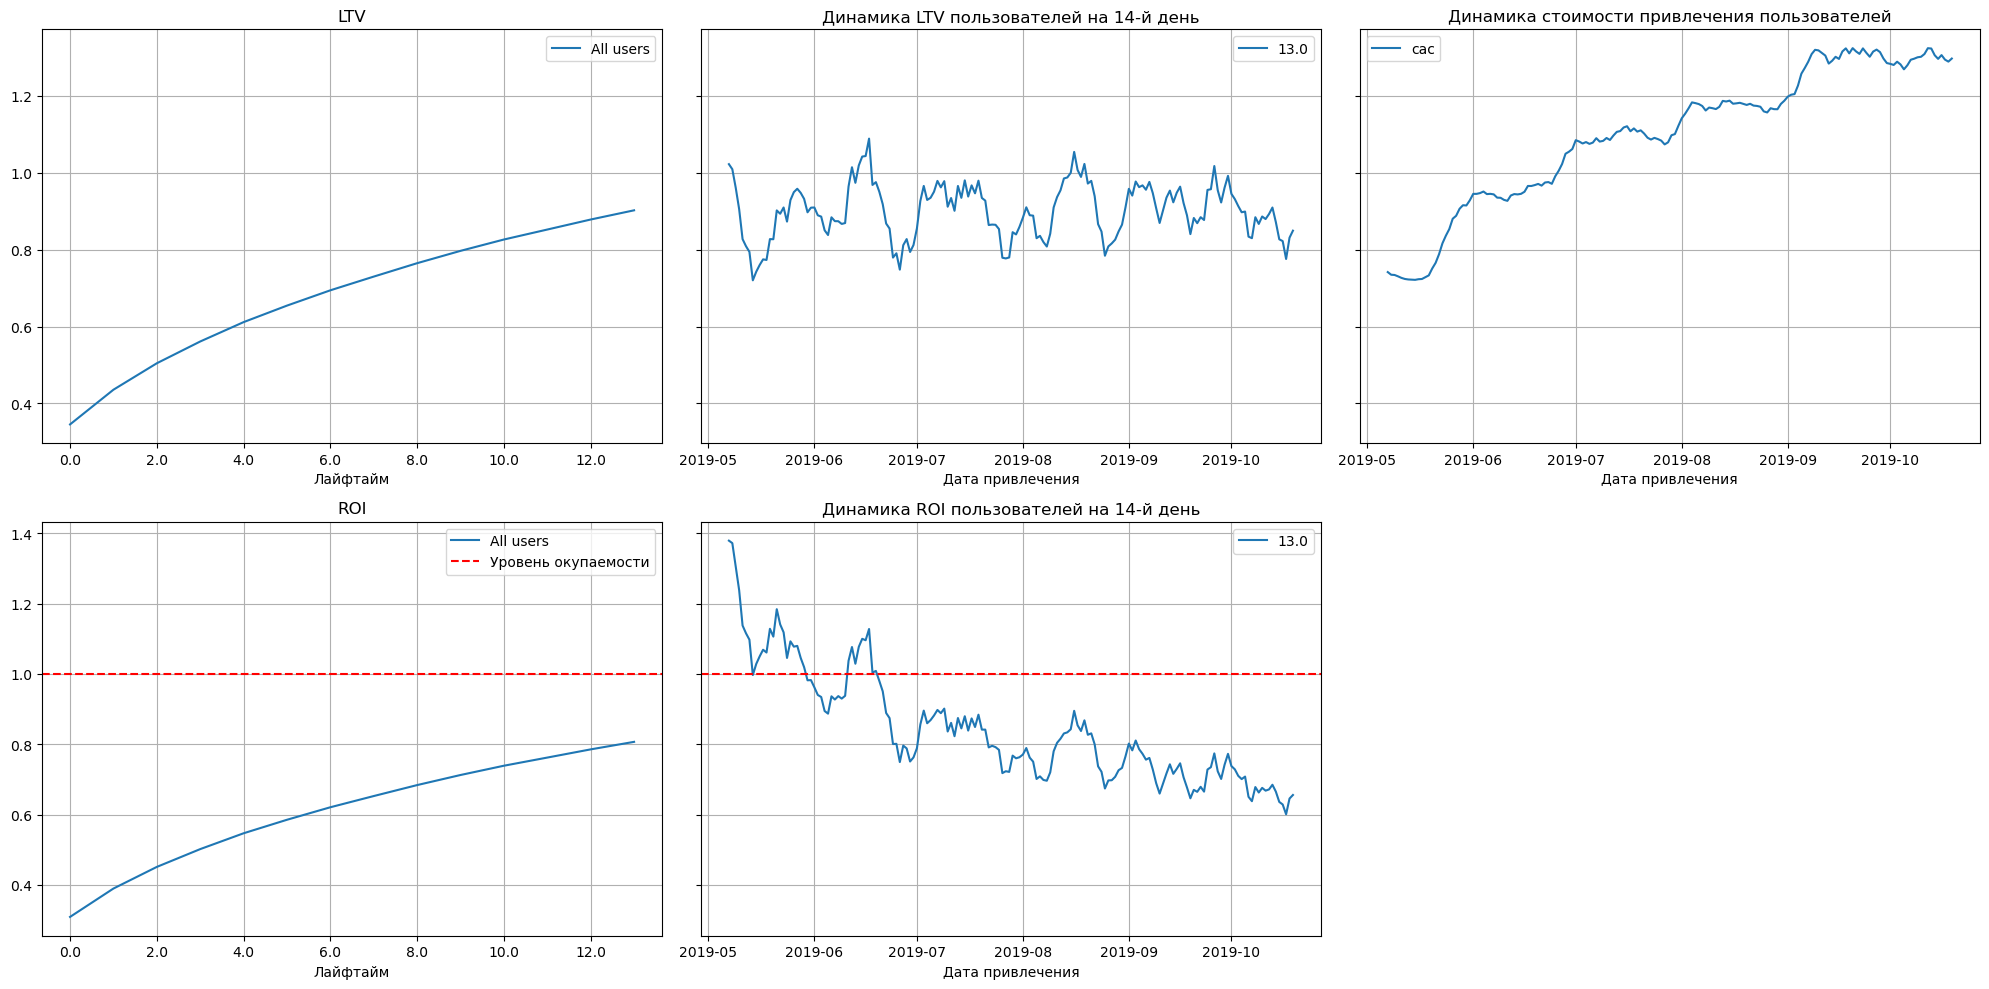

In [52]:
# считаем LTV и ROI без органики
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы
Реклама окупается только на 80% за 2 недели. Динамика LTV относительно стабильна, при этом САС с течение времени растет. Соответственно ROI резко снизился в начале проекта и далее продолжил снижаться.

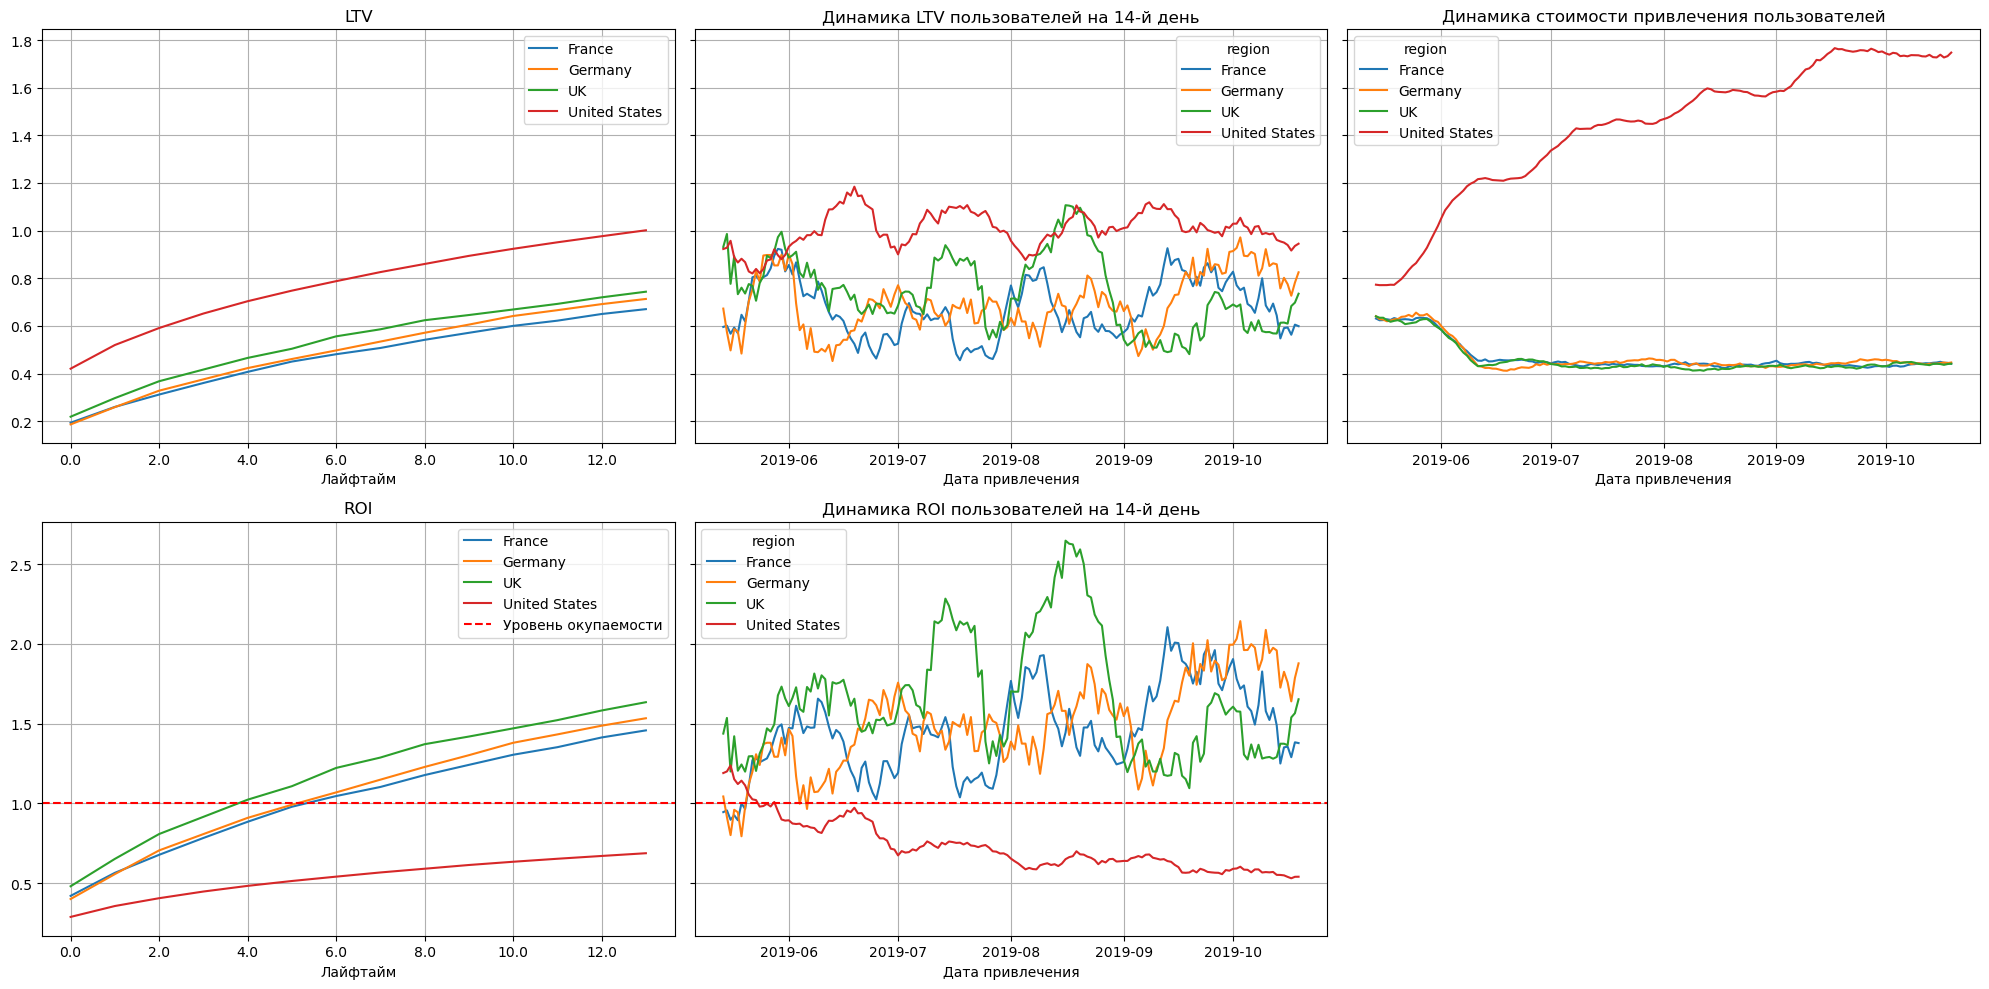

In [53]:
# смотрим окупаемость с разбивкой по странам без органики

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Выводы
Мы видим что, реклама не окупается в США и хорошо окупается в других станах. Видим анамально высокую и растущую стоимость привлечения пользователей в США. Стоимость привлечения в других странах снизилась в начале проекта.
LTV в Америке существенно выше чем в других странах. Динамика LTV относительно стабильна.

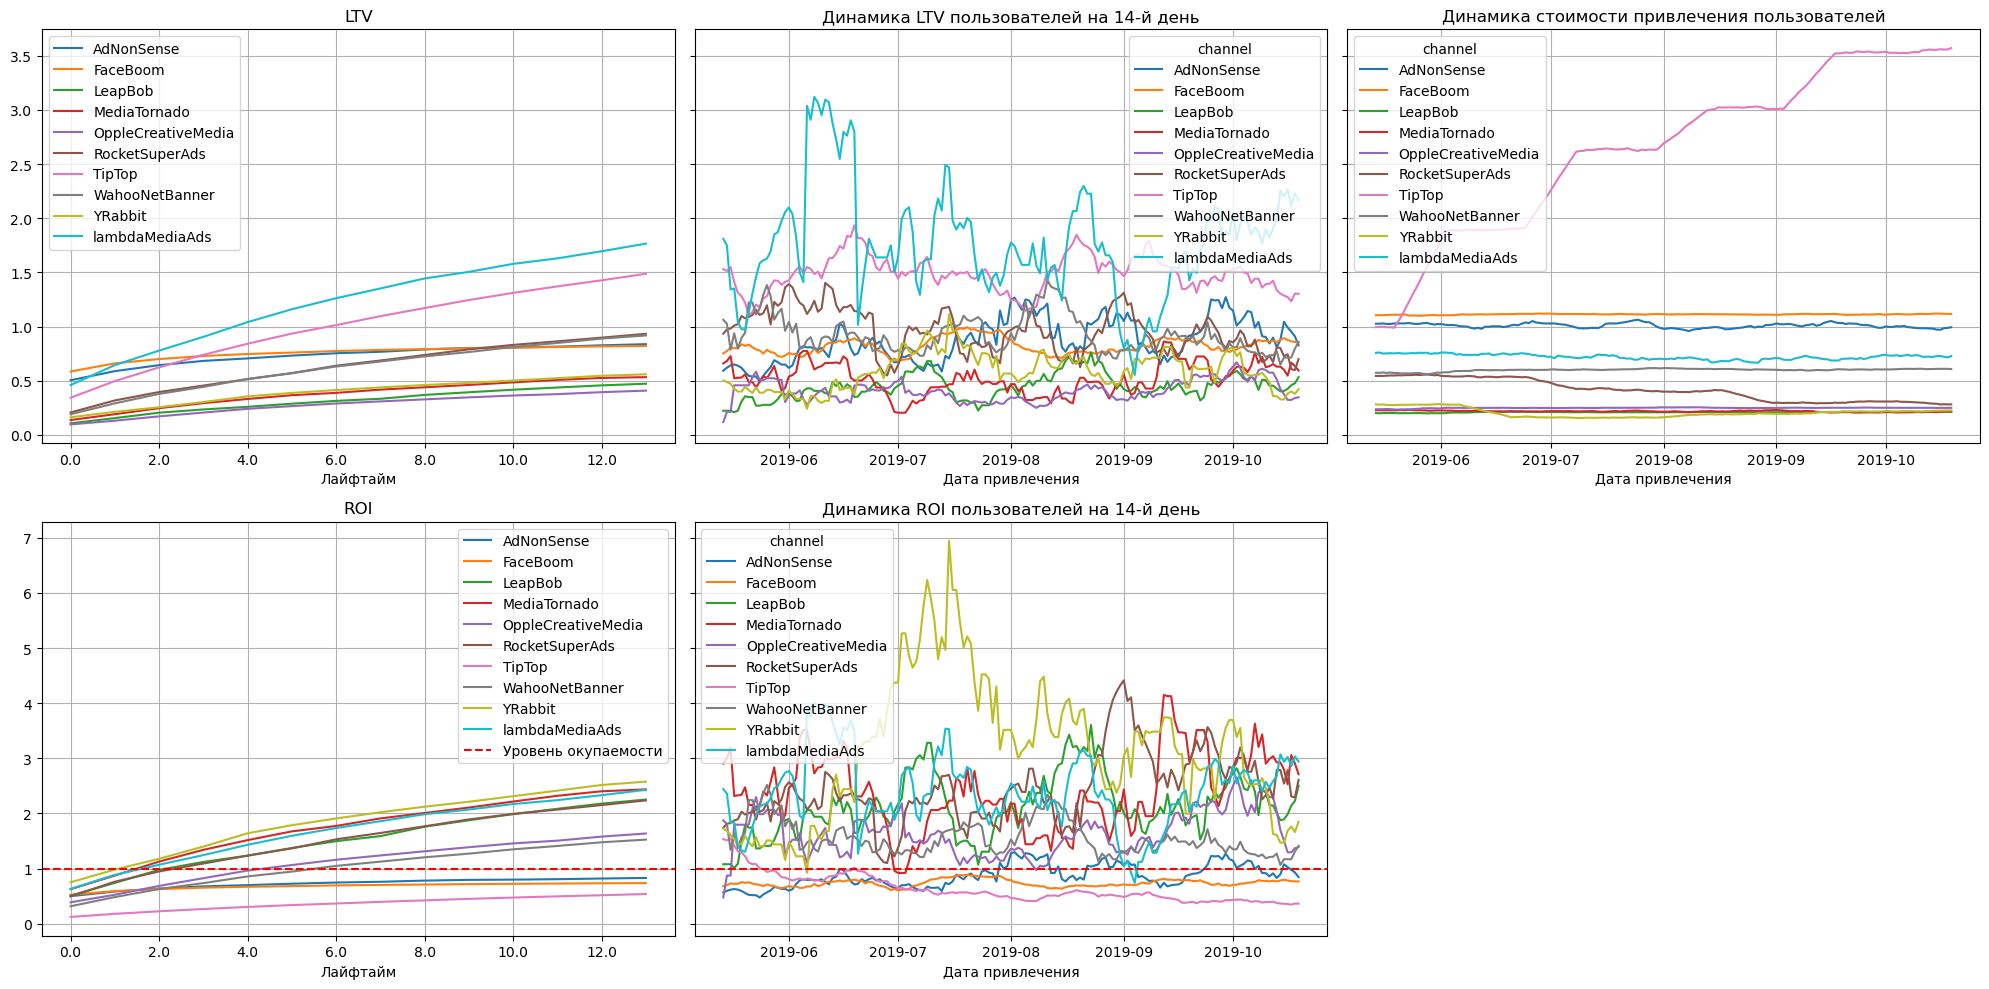

In [54]:
# смотрим окупаемость с разбивкой по источникам привлечения без органики

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [55]:
roi_grouped

cohort_size       cac       0.0       1.0       2.0  \
channel                                                                   
AdNonSense                 3702  1.008023  0.501010  0.584460  0.639288   
FaceBoom                  27544  1.113419  0.526040  0.593510  0.629343   
LeapBob                    8103  0.210000  0.509752  0.741436  0.978967   
MediaTornado               4167  0.219035  0.627684  0.874814  1.127410   
OppleCreativeMedia         8139  0.249908  0.389100  0.526504  0.686996   
RocketSuperAds             4251  0.417431  0.497256  0.763336  0.948932   
TipTop                    18498  2.757774  0.124575  0.180359  0.226321   
WahooNetBanner             8082  0.601856  0.317853  0.484298  0.629588   
YRabbit                    4102  0.217087  0.752238  0.983122  1.179250   
lambdaMediaAds             2056  0.727237  0.632899  0.887333  1.070887   

                         3.0       4.0       5.0       6.0       7.0  \
channel                                                                
AdNonSense          0.678069  0.701069  0.726752  0.748147  0.761519   
FaceBoom            0.654599  0.671035  0.682914  0.695801  0.704818   
LeapBob             1.120908  1.236450  1.374282  1.498034  1.589535   
MediaTornado        1.340729  1.516873  1.675432  1.773841  1.910531   
OppleCreativeMedia  0.826849  0.964769  1.065354  1.161037  1.238564   
RocketSuperAds      1.092347  1.235204  1.367935  1.531090  1.646391   
TipTop              0.268272  0.305449  0.339298  0.367570  0.397585   
WahooNetBanner      0.737309  0.858780  0.946188  1.049868  1.126808   
YRabbit             1.400049  1.641119  1.786814  1.910094  2.022179   
lambdaMediaAds      1.245178  1.432136  1.595673  1.735841  1.859323   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel                                                                         
AdNonSense          0.782922  0.796294  0.800573  0.808597  0.820631  0.831337  
FaceBoom            0.711685  0.719204  0.724119  0.729488  0.734210  0.737790  
LeapBob             1.759730  1.877030  1.988470  2.085248  2.179087  2.252399  
MediaTornado        2.008962  2.107371  2.216726  2.320602  2.402610  2.436519  
OppleCreativeMedia  1.314661  1.388265  1.457448  1.507006  1.580649  1.637075  
RocketSuperAds      1.767923  1.892809  1.991795  2.070538  2.152657  2.237019  
TipTop              0.424763  0.451627  0.475535  0.497310  0.517679  0.539532  
WahooNetBanner      1.205193  1.271878  1.350049  1.411192  1.477881  1.526304  
YRabbit             2.123045  2.212703  2.313569  2.414457  2.516446  2.578086  
lambdaMediaAds      1.986818  2.070251  2.171709  2.241794  2.331922  2.428712

In [56]:
# ROI по каналам на 14-й день
roi_grouped[13].sort_values(ascending=False)

channel
YRabbit               2.578086
MediaTornado          2.436519
lambdaMediaAds        2.428712
LeapBob               2.252399
RocketSuperAds        2.237019
OppleCreativeMedia    1.637075
WahooNetBanner        1.526304
AdNonSense            0.831337
FaceBoom              0.737790
TipTop                0.539532
Name: 13.0, dtype: float64

In [57]:
# LTV по каналам на 14-й день
ltv_grouped[13].sort_values(ascending=False)

channel
lambdaMediaAds        1.766250
TipTop                1.487908
RocketSuperAds        0.933801
WahooNetBanner        0.918615
AdNonSense            0.838006
FaceBoom              0.821469
YRabbit               0.559668
MediaTornado          0.533684
LeapBob               0.473004
OppleCreativeMedia    0.409118
Name: 13.0, dtype: float64

#### Выводы
Явно видно, что проблемы с окупаемостью проекта из-за того, что не окупаются следующие каналы привлечения:TipTop, FaceBoom, AdNonSense. Динамика стоимости привлечения показывает аномально высокую и постоянно растущую стоимость привлечения по каналу TipTop.

5 лучших по окупаемости каналов: YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds. Нужно отметить, что динамика ROI показывает, что окупаемость канала YRabbit в период с 1 до 20 июля была очень высокой (более 4), достигая 7 в момент максимума.

Лучшие каналы по LTV: lambdaMediaAds (1.766250), TipTop (1.487908).
Худшие каналы по LTV: OppleCreativeMedia (0.409118), LeapBob (0.473004), MediaTornado (0.533684), YRabbit (0.559668).

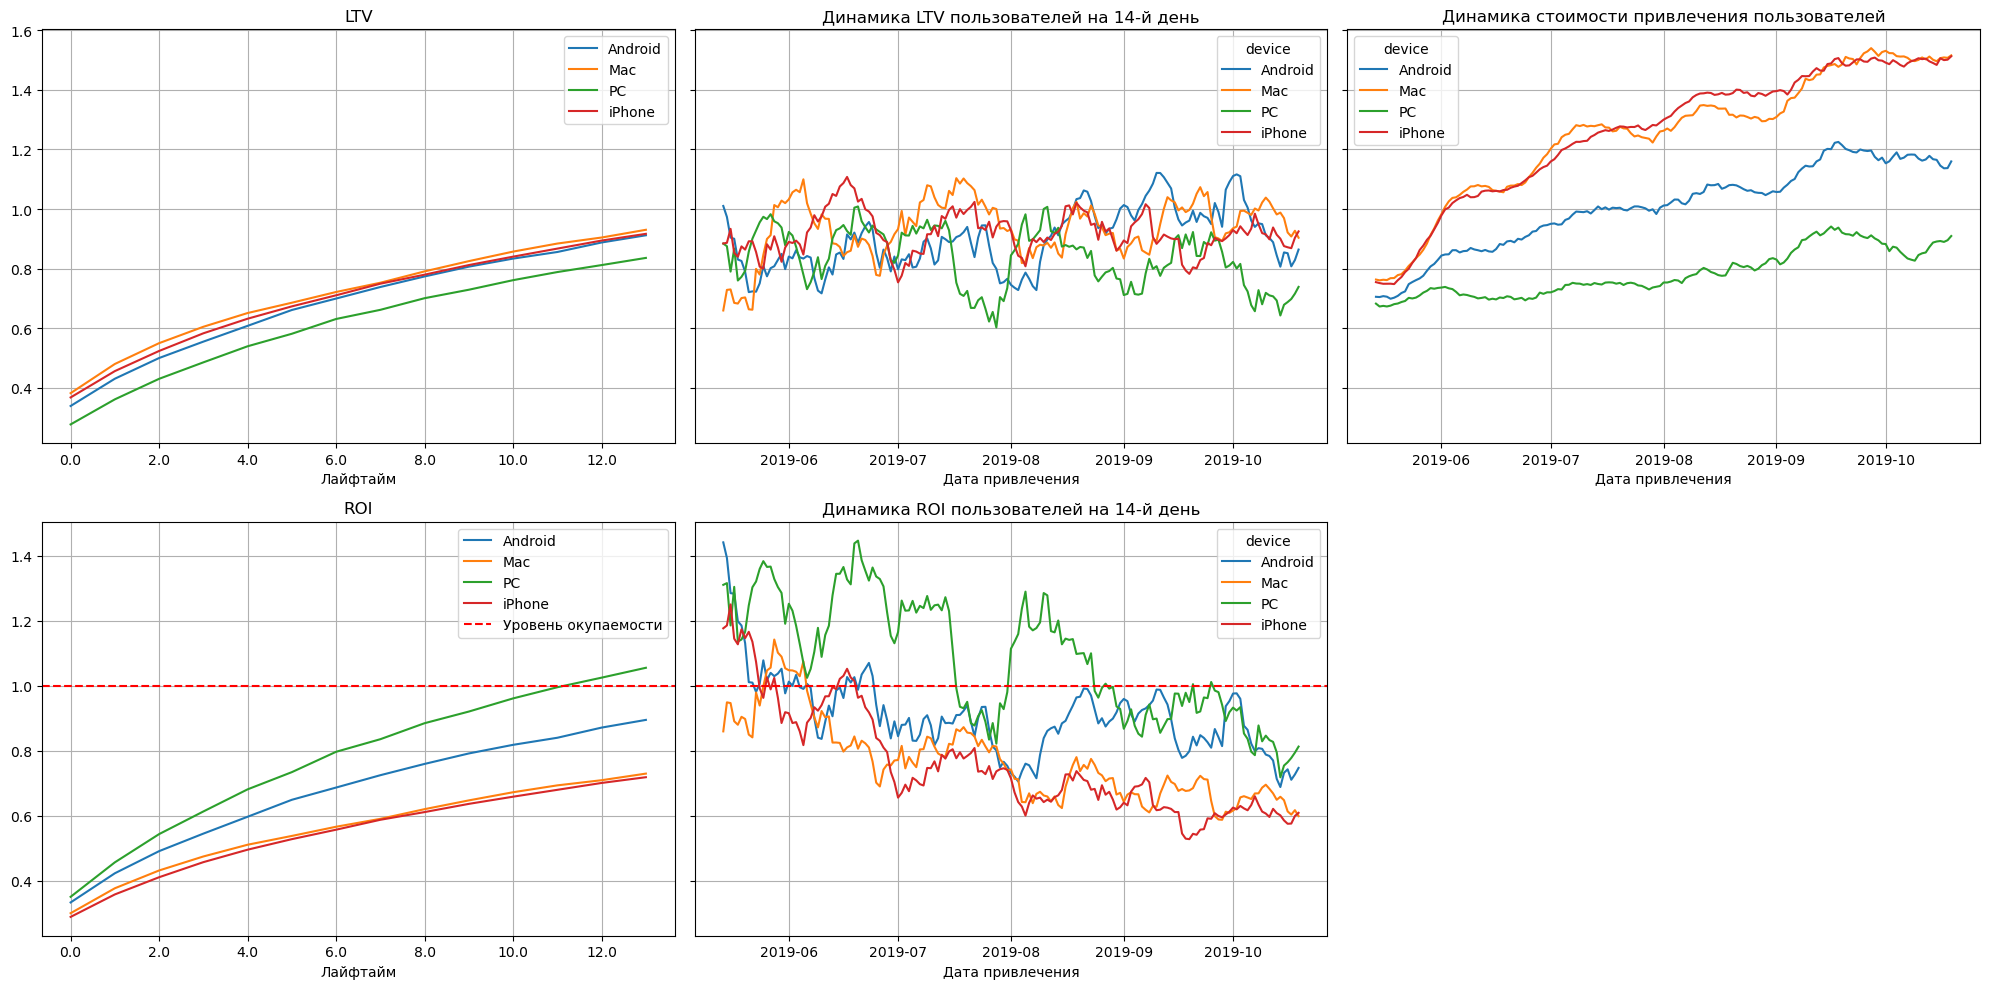

In [58]:
# смотрим окупаемость с разбивкой по устройствам без учета органики

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [59]:
# доля PC от всех дивайсов (в процентах) по странам
profiles.query('device == "PC"').groupby('region')['device'].count() /\
profiles.groupby('region')['device'].count() * 100

region
France           39.770774
Germany          39.683599
UK               40.614509
United States    10.431791
Name: device, dtype: float64

По LTV выделяется в худшую соторну РС. Это связано с тем, что самый высокий LTV в Америке, а там доля PC примерно в 4 меньше, чем в других странах. Динамика LTV относительно стабильна. 
САС растет, наибольшая скорость роста у iPhone и Mac, опять же из-за большего распространения этих дивайсов в Америке.
В разрезе устройств не окупаются iPone, Mac (окупаемость примерно 70%) и Android (ок 90%).
Динамика ROI по всем устройствам нисходящая (обратная корреляция с САС).

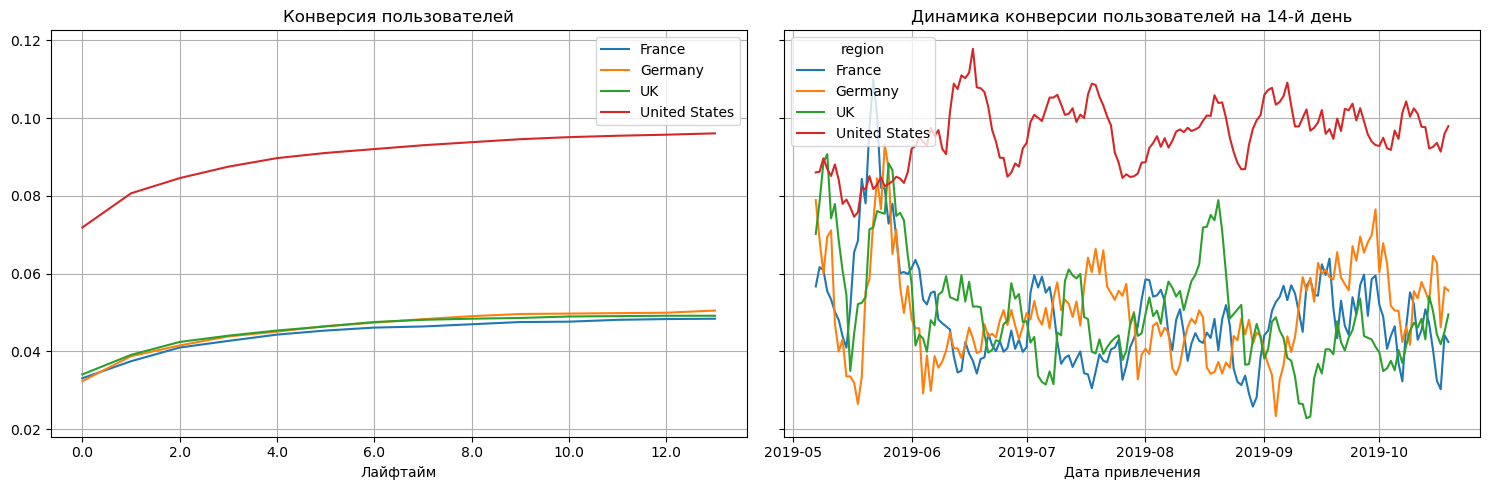

In [60]:
# смотрим конверсию с разбивкой по странам без учета органики

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия в США существенно лучше, чем других странах

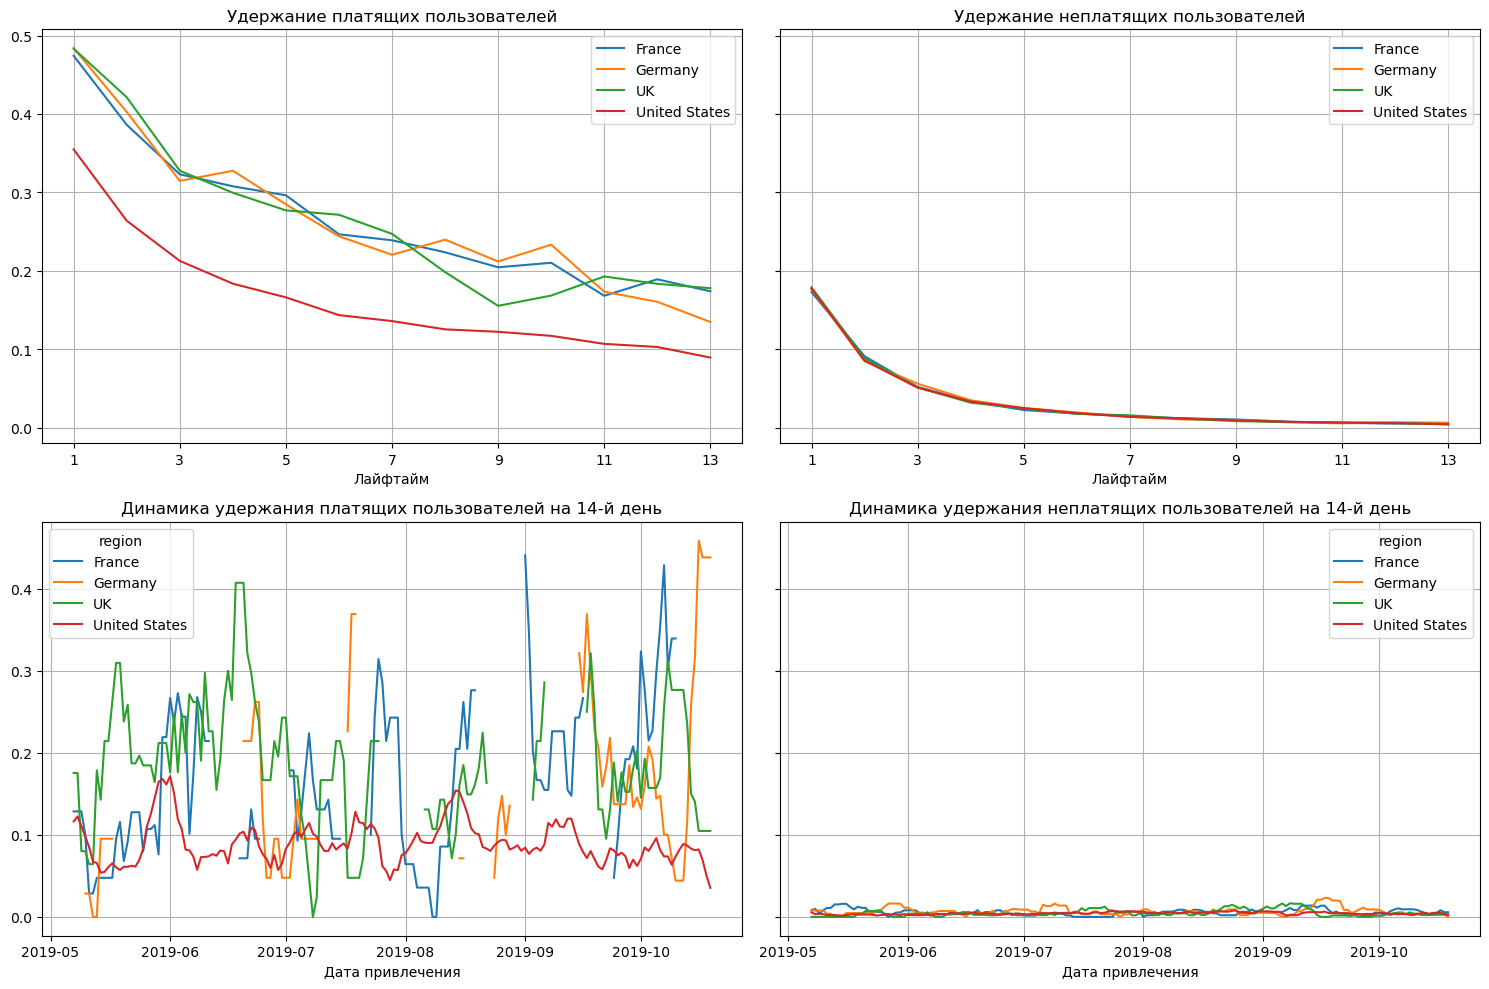

In [61]:
# смотрим удержание с разбивкой по странам без учета органики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А вот удержание платящих пользователей в США существенно и стабильно хуже, чем в других странах.

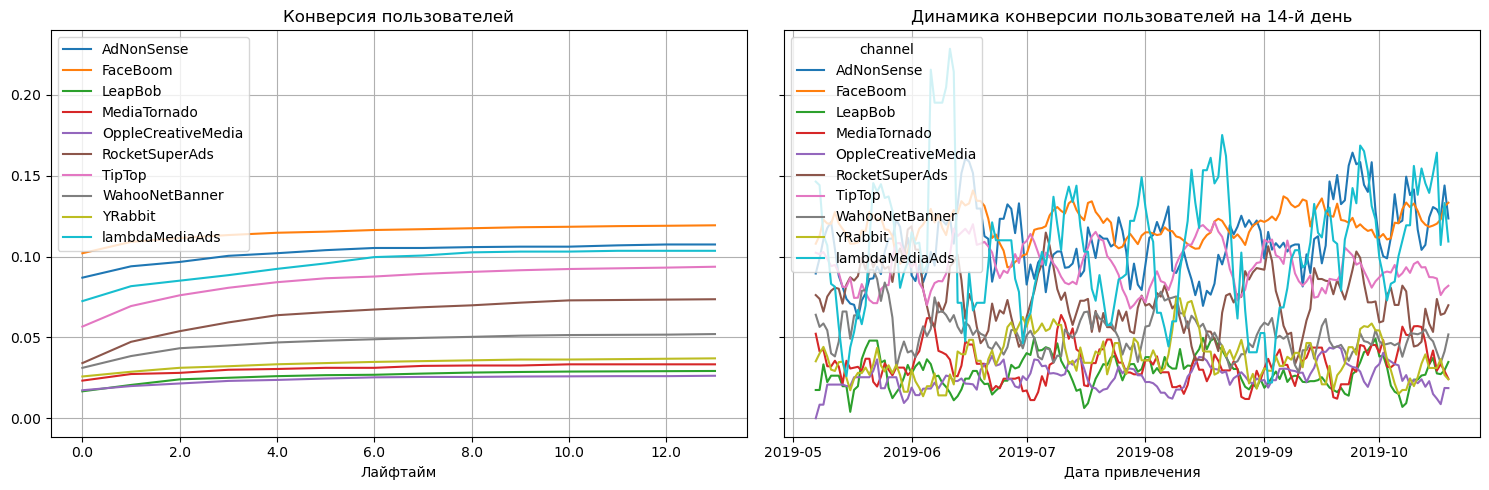

In [62]:
# смотрим конверсию с разбивкой по каналам без органики

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия каналов TipTop и AdNonSense достаточно хорошая, а у канала FaceBoom самая лучшая.

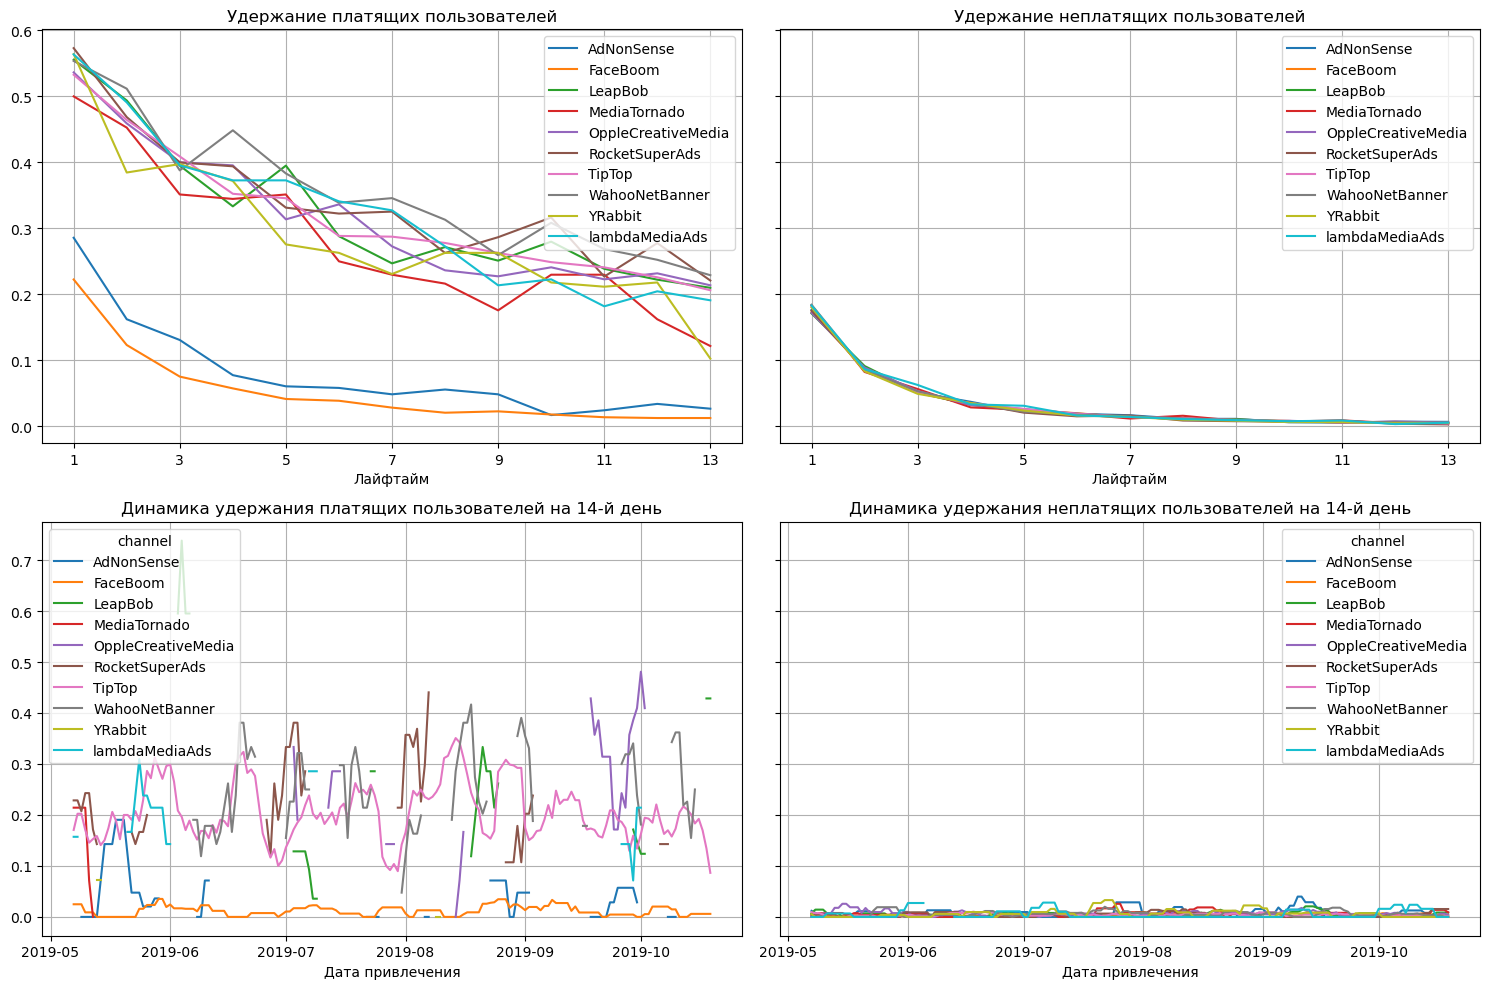

In [63]:
# смотрим удержание с разбивкой по каналам без органики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание у каналов AdNonSense и FaceBoom существенно хуже, чем у других каналов. Причем самые конверсионные каналы оказывается плохо удерживаются.

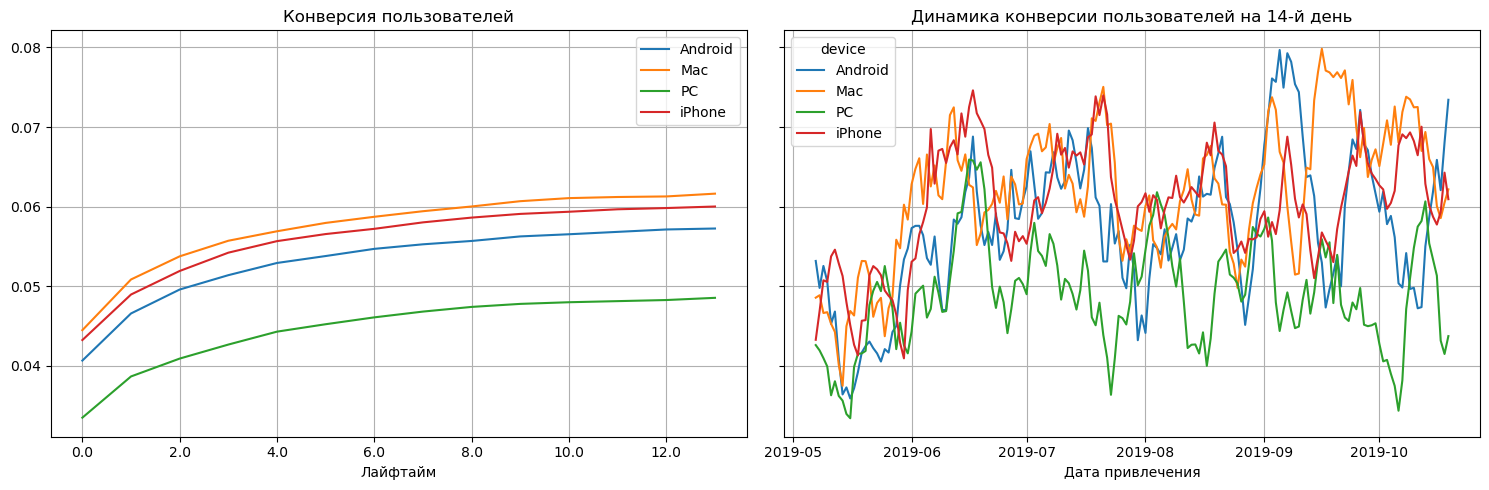

In [64]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучшая конверсия у пользователей Mac и iPhone, у пользователей РС конверсия существенно хуже. Это отражает долю устройств а Америке.

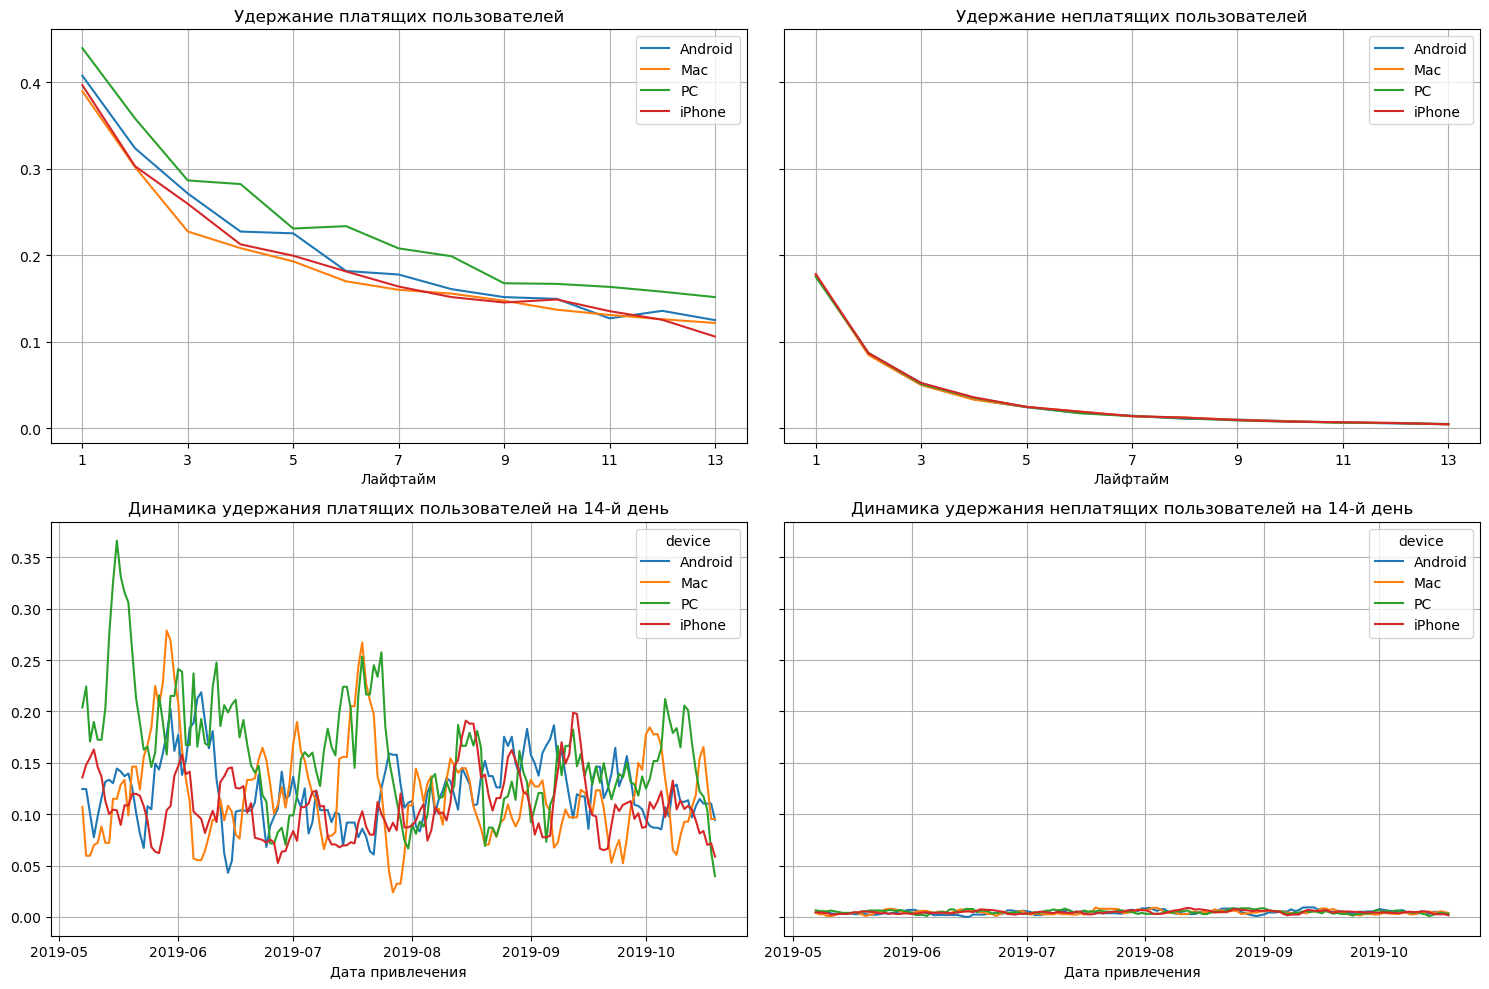

In [65]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лучшее удержание у пользователей РС, остальные устройства близки по удержанию. Оказывается при худшей конверсии PC довольно хорошо удерживает пользователей.

In [66]:
# посмотрим на каналы привлечения в США по объему затрат на рекламу и затем сравним с другими странами
(
profiles.query('region == "United States"')
    .groupby('channel').agg({'acquisition_cost':'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
)

acquisition_cost
channel                         
TipTop                  54751.30
FaceBoom                32445.60
RocketSuperAds           1833.00
MediaTornado              954.48
YRabbit                   944.22
organic                     0.00

In [67]:
(
profiles.query('region == "UK"')
    .groupby('channel').agg({'acquisition_cost':'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
    .round(2)
)

acquisition_cost
channel                             
WahooNetBanner               1808.89
AdNonSense                   1305.65
OppleCreativeMedia            763.18
LeapBob                       639.61
lambdaMediaAds                551.17
organic                         0.00

In [68]:
(
profiles.query('region == "Germany"')
    .groupby('channel').agg({'acquisition_cost':'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
    .round(2)
)

acquisition_cost
channel                             
WahooNetBanner               1552.97
AdNonSense                   1229.28
OppleCreativeMedia            640.73
LeapBob                       529.95
lambdaMediaAds                471.29
organic                         0.00

In [69]:
(
profiles.query('region == "France"')
    .groupby('channel').agg({'acquisition_cost':'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
    .round(2)
)

acquisition_cost
channel                             
WahooNetBanner               1789.14
AdNonSense                   1376.32
OppleCreativeMedia            747.34
LeapBob                       628.05
lambdaMediaAds                535.14
organic                         0.00

Каналы привлечения в Америке и Европе не пересекаются.

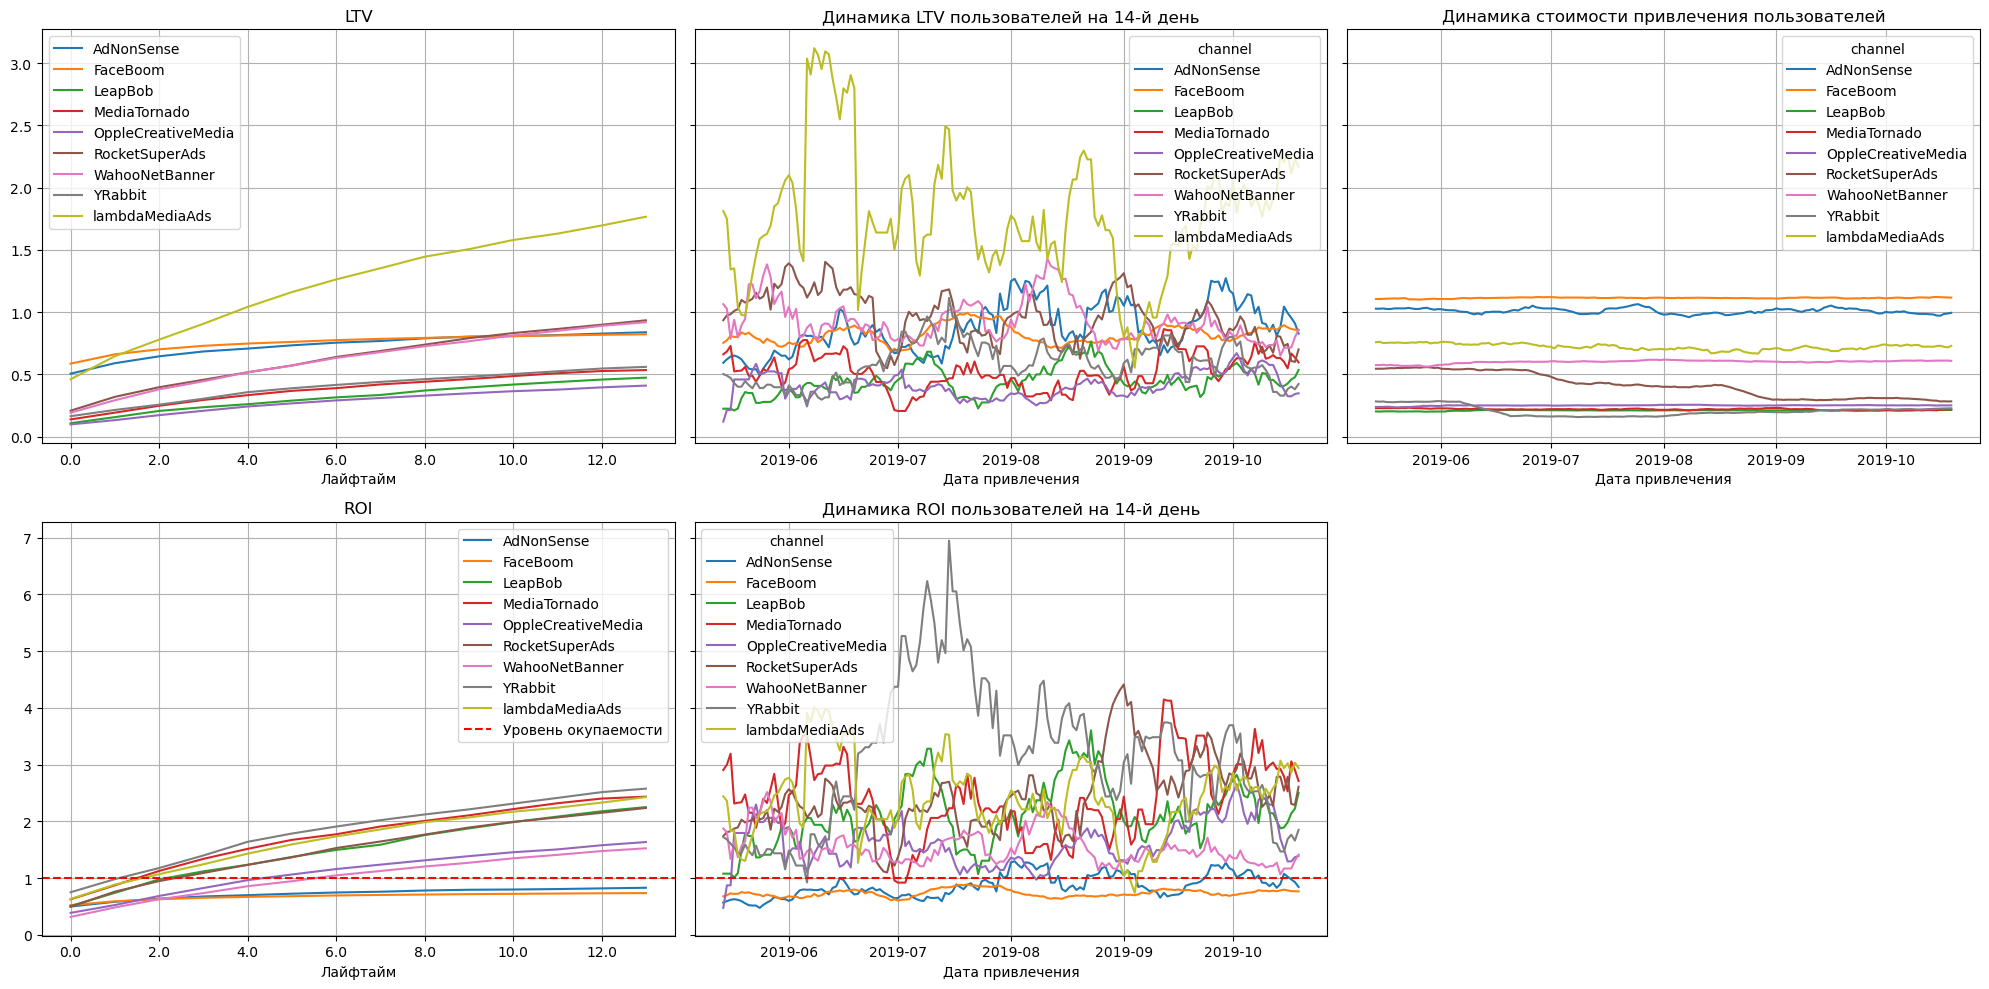

In [70]:
# смотрим окупаемость с разбивкой по источникам привлечения без органики и Tip Top

dimensions = ['channel']

profiles_without_organic_tip_top = profiles_without_organic.query('channel != "TipTop"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic_tip_top, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

In [71]:
roi_grouped[13].sort_values(ascending=False)

channel
YRabbit               2.578086
MediaTornado          2.436519
lambdaMediaAds        2.428712
LeapBob               2.252399
RocketSuperAds        2.237019
OppleCreativeMedia    1.637075
WahooNetBanner        1.526304
AdNonSense            0.831337
FaceBoom              0.737790
Name: 13.0, dtype: float64

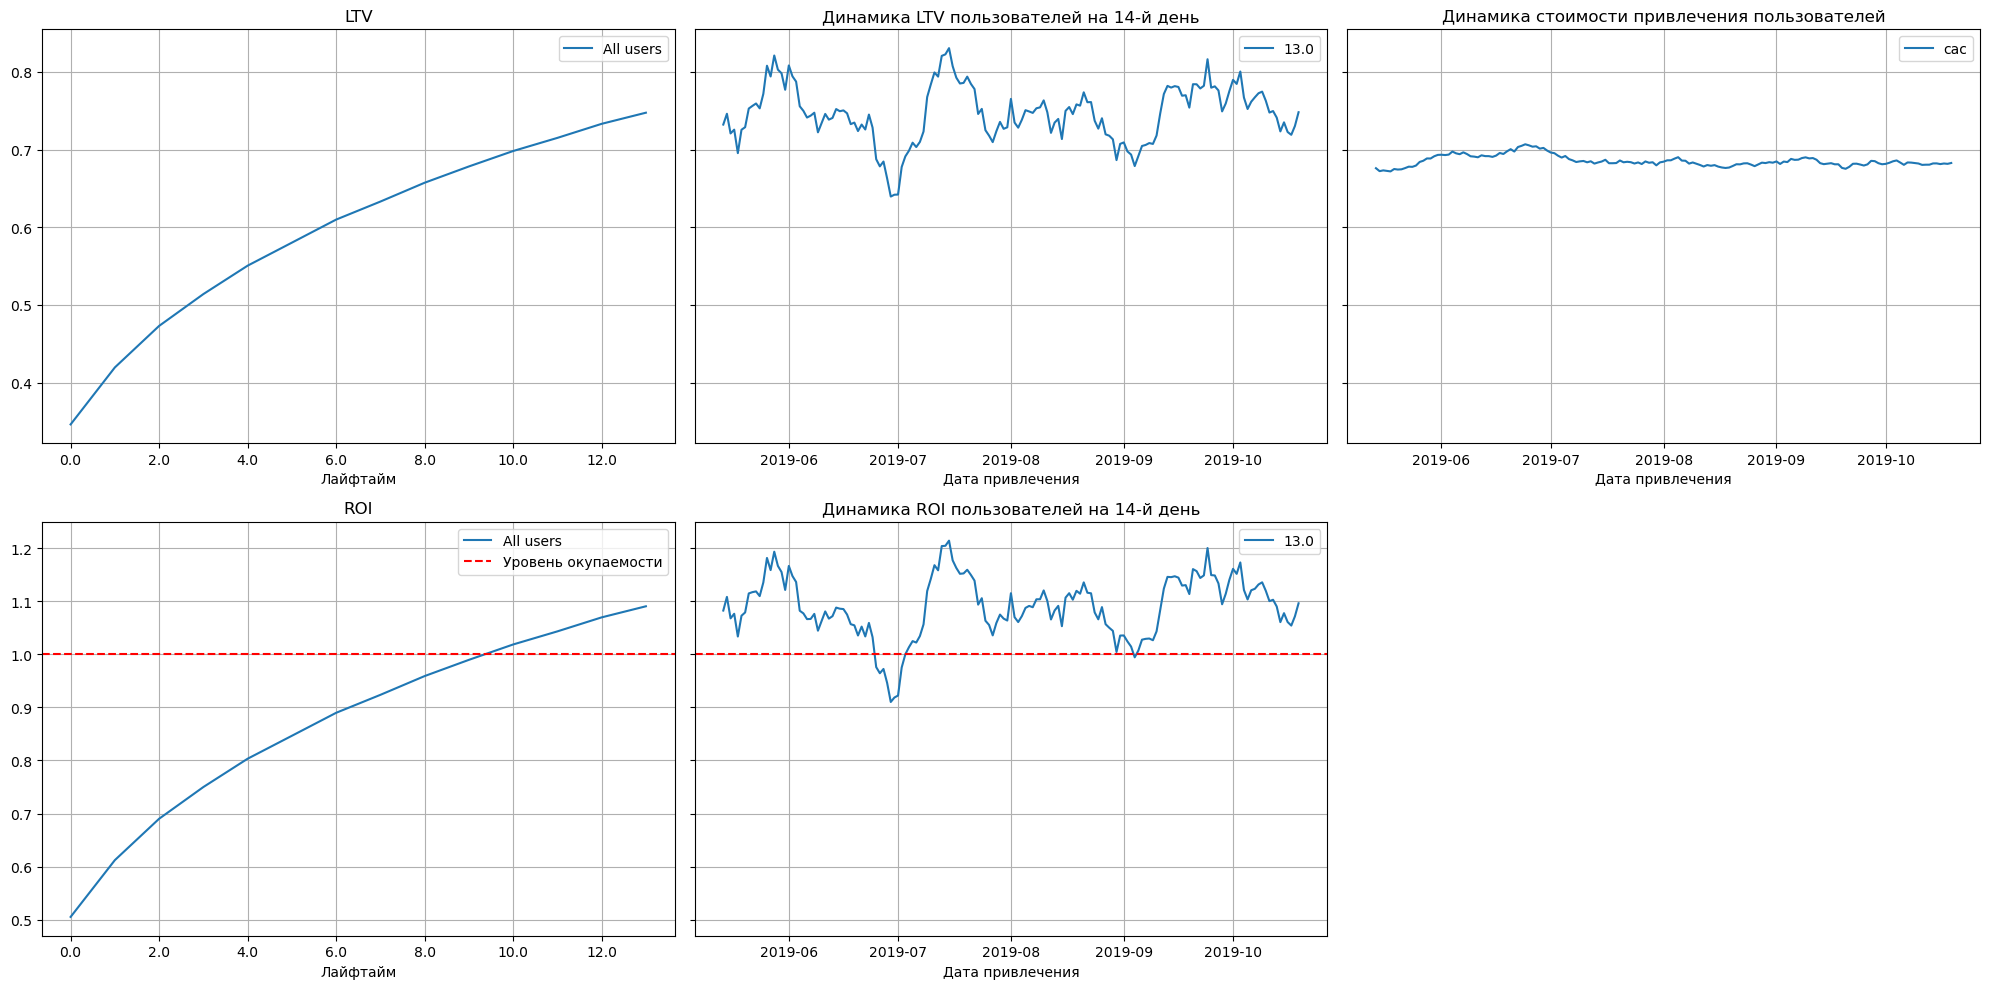

In [72]:
# смотрим окупаемость с разбивкой по источникам привлечения без органики и Tip Top по проекту в целом

dimensions = []

profiles_without_organic_tip_top = profiles_without_organic.query('channel != "TipTop"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic_tip_top, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

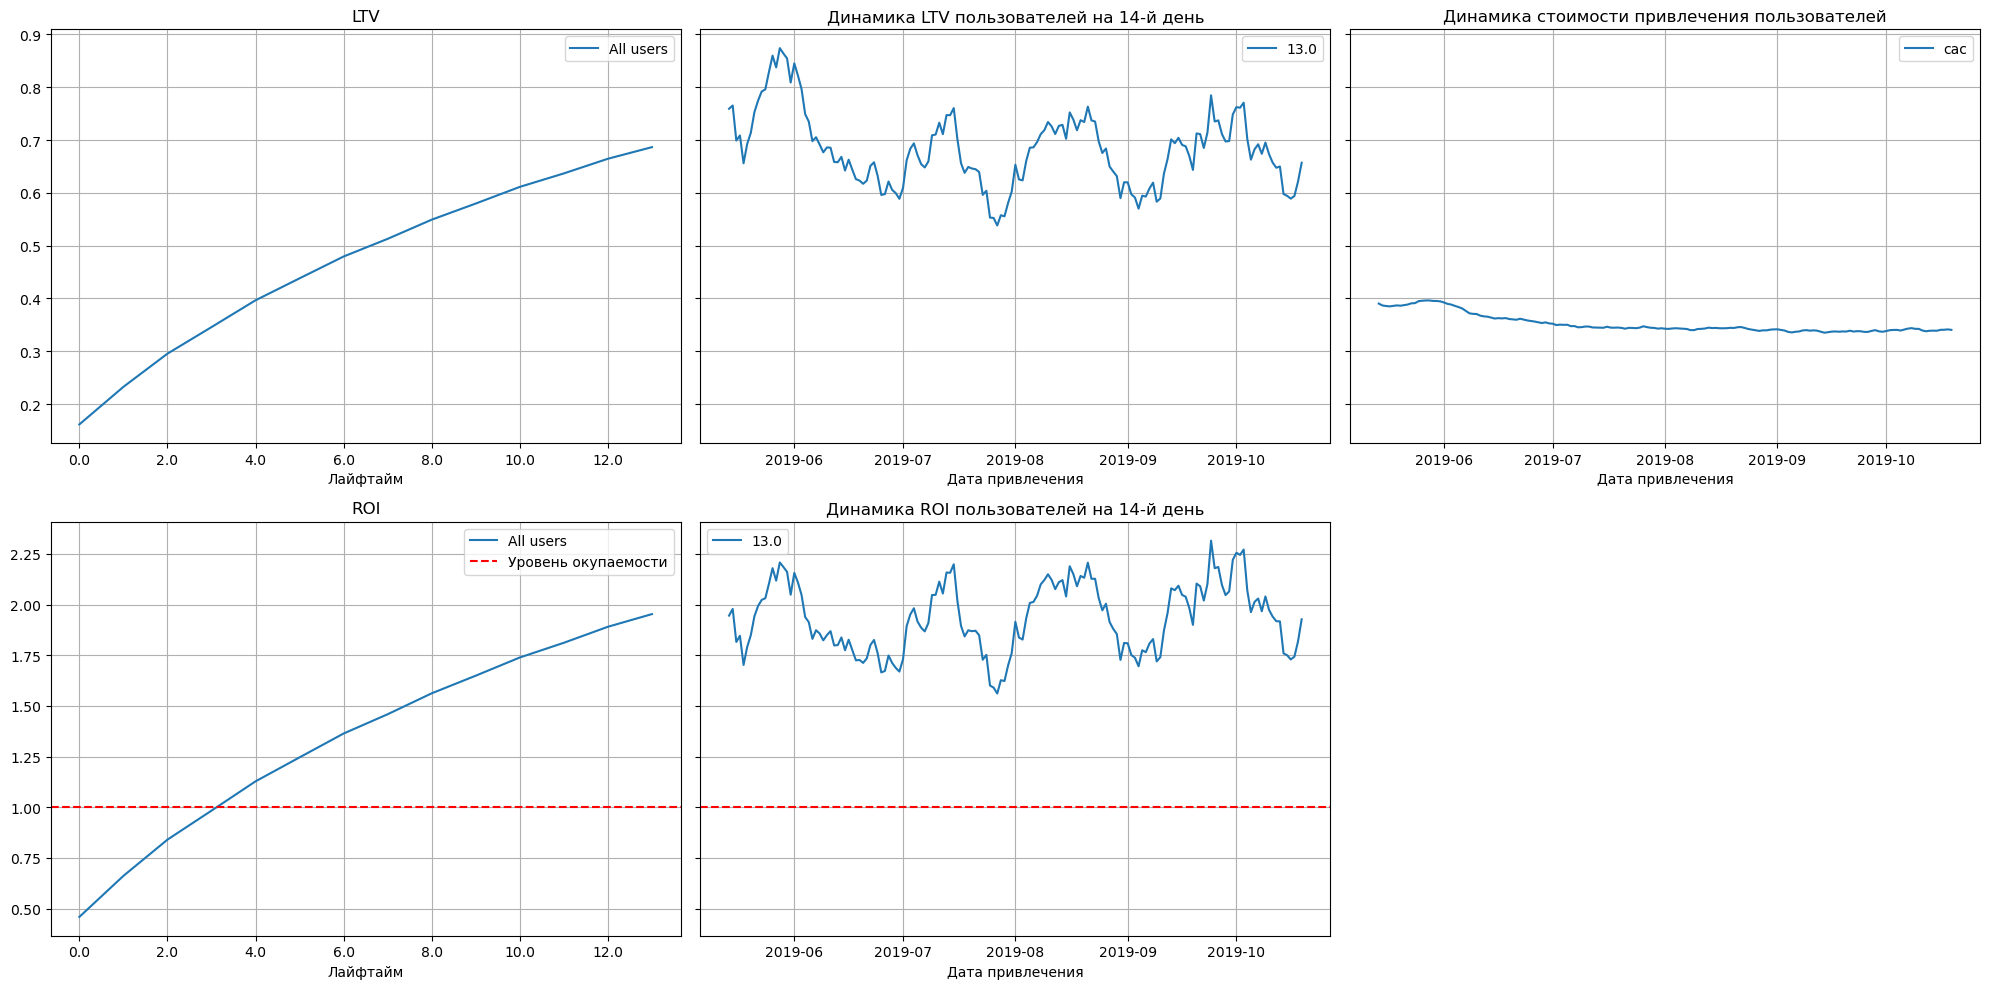

In [73]:
# смотрим окупаемость с разбивкой по источникам привлечения без органики, Tip Top, FaceBoom и AdNonSense по проекту в целом

dimensions = []

profiles_without_organic_tip_top_fb_ans = (profiles_without_organic_tip_top
                                           .query('channel != "FaceBoom" & channel != "AdNonSense"'))

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic_tip_top_fb_ans, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Анализируем показатели без самых дорогих каналов из кампании

Сравним прибыль проекта на 14-й день:
 - без 3-х каналов и 
 - со всеми каналами

In [74]:
# профайл без 3-х каналов: FaceBoom, AdNonSense и TipTop
profiles_without_tip_top_fb_ans = (profiles
                                   .query('channel != "FaceBoom" & channel != "AdNonSense" & channel != "TipTop"'))

In [75]:
# получим LTV
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_tip_top_fb_ans, orders, observation_date, horizon_days, dimensions=dimensions)

In [76]:
ltv_grouped[13]

cohort
All users    0.472
Name: 13.0, dtype: float64

In [77]:
# количество пользователей
profiles_without_tip_top_fb_ans['user_id'].count()

97423

In [78]:
# выручка на 14 день
ltv_grouped[13]*profiles_without_tip_top_fb_ans['user_id'].count()

cohort
All users    45983.643413
Name: 13.0, dtype: float64

In [79]:
# затраты на маркетинг
profiles_without_tip_top_fb_ans['acquisition_cost'].sum()

14389.15

In [80]:
# прибыль проекта на 14 день без 3-х каналов
profit_without_3_channels = (round(ltv_grouped[13]*profiles_without_tip_top_fb_ans['user_id'].count() - 
                             profiles_without_tip_top_fb_ans['acquisition_cost'].sum(), 0)
                            )
profit_without_3_channels[0]

31594.0

In [81]:
# получим LTV для профайла со всеми каналами
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

In [82]:
ltv_grouped[13]

cohort
All users    0.680757
Name: 13.0, dtype: float64

In [83]:
# количество пользователей
profiles['user_id'].count()

150008

In [84]:
# выручка на 14 день
ltv_grouped[13]*profiles['user_id'].count()

cohort
All users    102119.045133
Name: 13.0, dtype: float64

In [85]:
# затраты на маркетинг
profiles['acquisition_cost'].sum()

105497.29999999999

In [86]:
# прибыль проекта на 14 день со всеми каналами
profit = round(ltv_grouped[13]*profiles['user_id'].count() - profiles['acquisition_cost'].sum(), 0)
profit[0]

-3378.0

#### Выводы

In [87]:
print(f'Прибыль компании на 14-й день без 3-х самых дорогих (по рекламе) каналов: {profit_without_3_channels[0]}')
print(f'Прибыль компании на 14-й день со всеми каналами привлечения : {profit[0]}')      

Прибыль компании на 14-й день без 3-х самых дорогих (по рекламе) каналов: 31594.0
Прибыль компании на 14-й день со всеми каналами привлечения : -3378.0


### Выводы по проекту:
Проблема с окупаемостью проекта связана с использованием неэффективных каналов привлечения, это FaceBoom, AdNonSense, TipTop. В каналах FaceBoom, AdNonSense очень низкое удержание, в канале TipTop аномально высокая стоимость привлечения.

Низкая окупаемость в США объясняется тем, что практически всё привлечение строится на неэффективных каналах TipTop и FaceBoome.

Более низкая окупаемость iPhone и MAC обьясняется тем, что в США эти устройства более распространены.

Рекомендаци для маркетинга для повышения окупаемости проекта - перераспределить средства между каналами привлечения:
- уменьшить расходы на неэффективные каналы привлечения FaceBoom, AdNonSense, TipTop;
- увеличить расходы на более эффективные каналы привлечения YRabbit, MediaTornado, LambdaMediaAds, LeapBob, RocketSuperAds.